The data set given for the project is from " https://archive-beta.ics.uci.edu/ml/datasets/productivity+prediction+of+garment+employees " 
and is cited as Productivity Prediction of Garment Employees. (2020). UCI Machine Learning Repository. 
The data file is attached as csv file. The following are details being provided . The data contains details on actual productivty of a garment industry, the data has been recorded on a day to day basis from the year 2015 to almost year end of 2015. The data set at first needs to be examined and the structure of the data set needs to be understood. The data has been recorded in terms of the following details
Date 
Quarter (Four Quarters)
Department (Sewing and Finishing)
Day (Please note the way data is recorded is that based on a dept and productivity is recorded for various lines in each dept, hence you would find multiple productivity recorded for each combination of vairables such as team, dept, smv, date)
Team 
Targeted_Producitivity (Target which needs to be achieved)
SMV (Standard Minute Value) : Standard time for a Task in this case you can take standard time to complete a garment 
WIP (Work in progress)
Over_time
Incentive 
Idle_time
Idle_men (Idle workers)
no_of_style_change
no_of_workers
Actual_Producitivity

The aim is of this project is to obtain an understanding of the data and decipher the relationship among the variables, understanding what possible variables can affect producivity which can be whether overtime or team size or number of worker or department type or a day (like monday ect...) ect.. have an effect. 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import f_oneway
# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

Exploratory Data Analysis & Descriptive Statistics 

1. Basic Summary statistics of the data for the numerical variables 
2. basic Summary of the data for the number of working days, count of quarters in the year
3. Mean and standard deviation of actual producivity for every quarter and Histogram plot of actual productivity based on every quarter and conclusion accordingly
4. Number count for sewing and finishing department 
5. Mean and standard deviation of actual producivity for sewing and finishing Histogram plot of actual productivity based on both department and conclusion accordingly
6. Number count for  teams, smv across the year
7. Histogram & Box plot of actual productivity based on all working days, team size, quarterts and  Conclude accordingly 
8. Find correlation matrix and draw heat map for all variables
9. Conclude (Is the company able to meet target, are they giving incentives based on producitivity, does overtime have any effect on productivity)
10. Find the correlation between actual and target productivity for every quarter and for every department. What do you conclude
11. Based on the above details of EDA and Descriptive statisitcs analysis what would you say could be the possible factors which can affect producitivity. 

In [12]:
df=pd.read_csv('garments_worker_productivity+29.csv')
df

<IPython.core.display.Javascript object>

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,01-01-2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,01-01-2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,01-01-2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,01-01-2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,01-01-2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,03-11-2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,03-11-2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,03-11-2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,03-11-2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [13]:
#1
df.describe()


,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [14]:
#2 basic Summary of the data for the number of working days, count of quarters in the year
df1=df.quarter.unique()
print(f'count of quarters in the year: {len(df1)}')
df1

count of quarters in the year: 5


array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

              mean       std
quarter                     
Quarter1  0.751560  0.161318
Quarter2  0.743710  0.171114
Quarter3  0.704759  0.175614
Quarter4  0.709067  0.185983
Quarter5  0.826177  0.183851


<IPython.core.display.Javascript object>

<Axes: xlabel='quarter', ylabel='actual_productivity'>

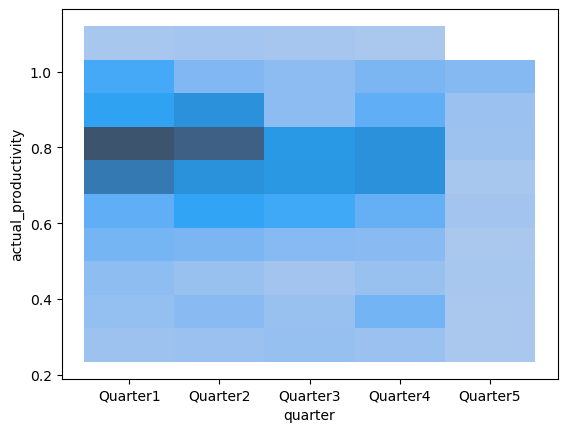

In [15]:
#3 Mean and standard deviation of actual producivity for every quarter and Histogram plot of actual productivity based on every quarter and conclusion accordingly

data1=df.groupby('quarter')['actual_productivity'].agg(['mean', 'std'])
print(data1)
sns.histplot(data=df,x='quarter',y='actual_productivity',bins=10)

In [52]:
#4 Number count for sewing and finishing department
sewing=len(df[df.department=='sewing'])
finishing=len(df[df.department=='finishing'])
# df.department.count()
print(f'count of sewing: {sewing}')
print(f'count of finishing: {finishing}')

count of sewing: 691
count of finishing: 506


                mean       std
department                    
finishing   0.752951  0.197021
sewing      0.722013  0.154784


<IPython.core.display.Javascript object>

<Axes: xlabel='department', ylabel='actual_productivity'>

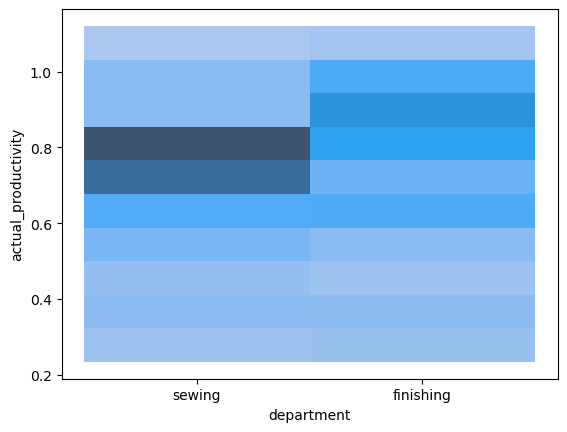

In [17]:
#5 Mean and standard deviation of actual producivity for sewing and finishing Histogram plot of actual productivity based on both department and conclusion accordingly
data2=df.groupby('department')['actual_productivity'].agg(['mean', 'std'])
print(data2)
sns.histplot(data=df,x='department',y='actual_productivity',bins=10)

In [18]:
#6 Number count for teams, smv across the year
count_team=sum(df.team)
count_smv=sum(df.smv)
# df.department.count()
print(f'count of team: {count_team}')
print(f'count of smv: {count_smv}')

count of team: 7693
count of smv: 18029.420000000035


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

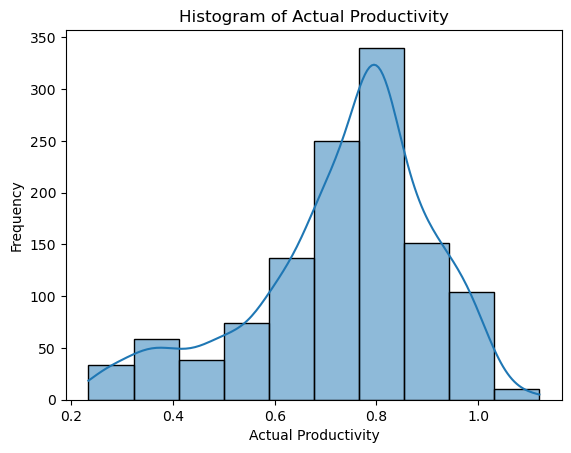

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

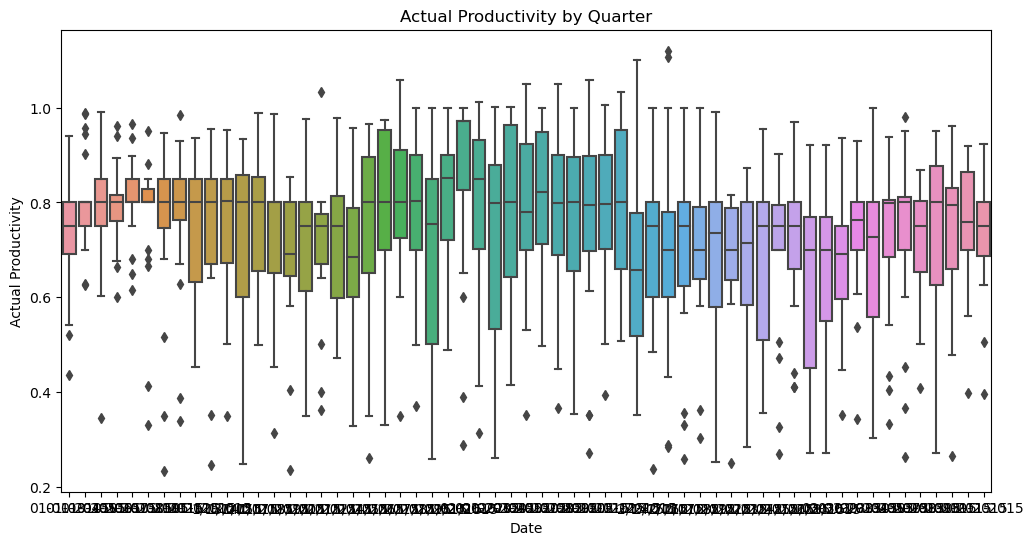

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

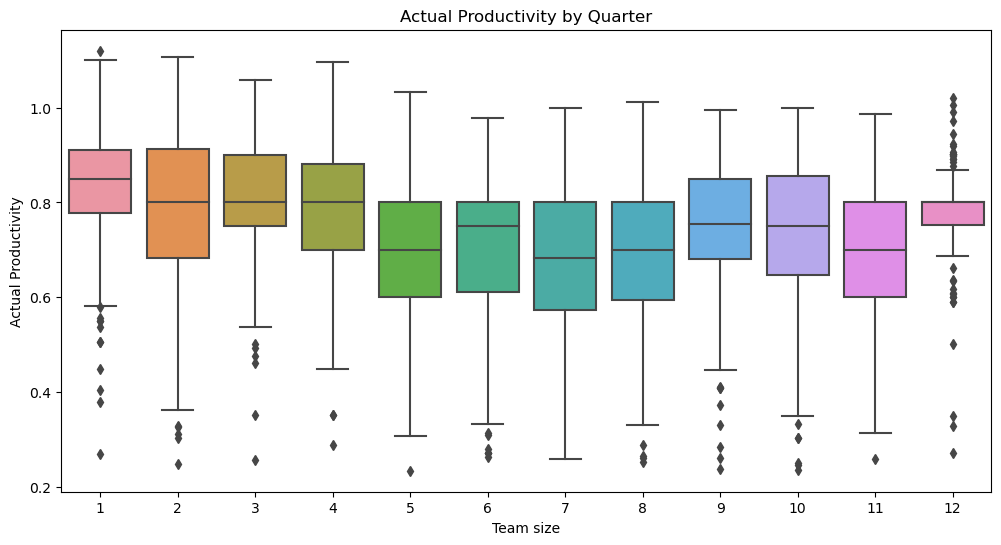

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

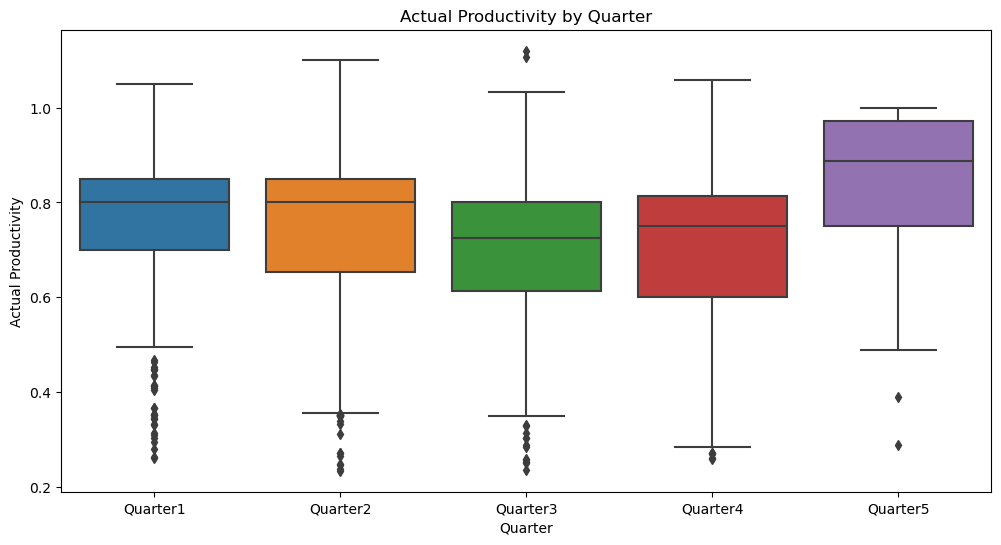

In [25]:
#7 Histogram & Box plot of actual productivity based on all working days, team size, quarterts and Conclude accordingly
sns.histplot(data=df, x='actual_productivity', bins=10, kde=True)
plt.title('Histogram of Actual Productivity')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='date', y='actual_productivity')
plt.title('Actual Productivity by Quarter')
plt.xlabel('Date')
plt.ylabel('Actual Productivity')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='team', y='actual_productivity')
plt.title('Actual Productivity by Quarter')
plt.xlabel('Team size')
plt.ylabel('Actual Productivity')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='quarter', y='actual_productivity')
plt.title('Actual Productivity by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Actual Productivity')
plt.show()






C:\Users\balur\AppData\Local\Temp\ipykernel_8904\4207308704.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  co_rel=df.corr()


<IPython.core.display.Javascript object>

<Axes: >

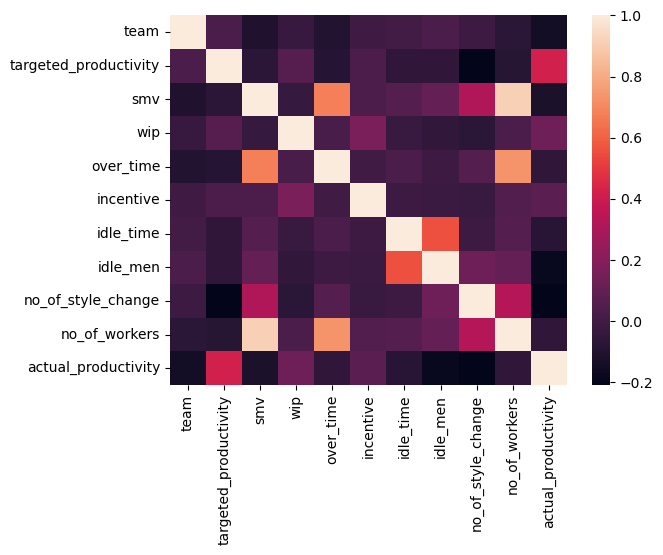

In [21]:
#8 Find correlation matrix and draw heat map for all variables
co_rel=df.corr()
sns.heatmap(co_rel)

In [ ]:
#9 Conclude (Is the company able to meet target, are they giving incentives based on producitivity, does overtime have any effect on productivity)
t_stats,p_value=stats.ttest_1samp(df['actual_productivity']-df['targeted_productivity'],0)
if p_value < 0.05:
    print("The company does not meet its targets.")
else:
    print("The company meets its targets.")

In [ ]:
#10 Find the correlation between actual and target productivity for every quarter and for every department. What do you conclude

correlation=df.groupby(['quarter','department'])['actual_productivity','targeted_productivity'].corr()
print(correlation)

In [ ]:
#11Based on the above details of EDA and Descriptive statisitcs analysis what would you say could be the possible factors which can affect producitivity.

Hypothesis Testing 

12. Test using Z test (take a random sample of more than 30 and assume sigma =.1) whether the finishing department has achieved more acheived producitivity than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05

13. Test using Z test(take a random sample of more than 30 and assume sigma =.1) whether the sewing department has achieved more producitivit than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05.

14. Conduct a two sample t test (take a random sample more than 30) to check whether the finishing department has achieved more actual productivtiy than sewing     department. State your null and alternative hypothesis 

15. Conduct a two sample t (take a random sample less than 30) test to check whether the finishing department has achieved obtained higher incentive than sewing department, state your null and alternative hypothesis. In case test fails for normality check, then take a sample more than 30. 

16. The manager has asked you to classifiy low productivity as less than .5, medium between .5 and less than .75 and higher
    as greater than or equal to .75. He believes that the percentage of  actual producvity  in  sewing departemnt for   
    person classified as low is 30%, for medium is 40% and for high is 30%. USing chi square test can you prove whether his 
    hypothesis is right or not 

17. Based on the EDA analysis the manager has decided to find out whether different quarters are having an impact on actual productivity. Assuming normality of data conduct an analysis accordingly Conduct an ANOVA for comparing productivity for Quarter1, Quarter2, Quarter3, Quarter 4 and accordingly conclude (Assume data is normally distributed)

18. Based on the EDA analysis the manager has decided to find out whether different days  are having an impact on actual productivity. Assuming normality of data conduct an analysis accordingly Conduct an ANOVA for comparing productivity for Quarter1, Quarter2, Quarter3, Quarter 4 and accordingly conclude (Assume data is normally distributed)

19. In case the manager is interested whether day and quarters have an impact on actual producitivity, provide an analysis and identify which factors play a role in affecting productivty

20. Based on 17 eliminate one of the variabes which is not significant and reconduct analysis using deparment as another variable, what do you conclude.

21. Based on EDA and Hypothesis would you aggree or disaggree with the finding, also in addition summarize the findings based on both analysis and provide a recommendation on what you can thinking on improving the producitivity. 


In [207]:
#12 Test using Z test (take a random sample of more than 30 and assume sigma =.1) whether the finishing department has achieved more acheived 
# producitivity than .75 for a standard deviation of .1.State your null and alternative hypothesis. alpha value is .05
# H0<=.75
# H1>.75
sigma=0.1
alpha=.05
n=45
std=0.1
sample=df.sample(n=45,replace=False,random_state=10)
s_mean = sample[sample['department'] == 'finishing']['actual_productivity'].mean()
s_mean 
se=std/np.sqrt(n)
z_stat=(s_mean-.75)/se
critical_z=stats.norm.ppf(1-alpha)
critical_z
if z_stat > critical_z:
    print("Reject the null hypothesis: The finishing department has achieved more productivity than 0.75.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to conclude that the finishing department has achieved more productivity than 0.75.")

# sample[sample.department=='finishing'].mean()

Reject the null hypothesis: The finishing department has achieved more productivity than 0.75.


In [212]:
#13 Test using Z test(take a random sample of more than 30 and assume sigma =.1) whether the sewing department has achieved 
# more producitivit than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05.

sigma=0.1
alpha=.05
n=45
std=0.1
sample=df.sample(n=45,replace=False,random_state=10)
s_mean = sample[sample['department'] == 'sewing']['actual_productivity'].mean()
s_mean 
se=std/np.sqrt(n)
z_stat=(s_mean-.75)/se
critical_z=stats.norm.ppf(1-alpha)
critical_z
if z_stat > critical_z:
    print("Reject the null hypothesis: The finishing department has achieved more productivity than 0.75.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to conclude that the finishing department has achieved more productivity than 0.75.")



Fail to reject the null hypothesis: There is not enough evidence to conclude that the finishing department has achieved more productivity than 0.75.


In [230]:
#14 Conduct a two sample t test (take a random sample more than 30) to check whether the finishing department has achieved 
# more actual productivtiy than sewing department.State your null and alternative hypothesis
pop_finishing=df[df['department']=='finishing']['actual_productivity']
pop_sweing=df[df['department']=='finishing']['actual_productivity']
s_finishing=pop_finishing.sample(n=50,replace=False,random_state=20)
s_sweing=pop_sweing.sample(n=50,replace=False,random_state=21)
alpha=0.05
t_stat,p_value=stats.ttest_ind(s_finishing,s_sweing)
print(t_stat,p_value)

if p_value<t_stat:
    print('reject null hypothesis')
else:
    print('fail to reject null hypothesis')

-0.2931759037547011 0.7700076132902217
fail to reject null hypothesis


In [49]:
#15 Conduct a two sample t (take a random sample less than 30) test to check whether the finishing department has achieved obtained higher incentive than sewing department, state your null and alternative hypothesis. 
# In case test fails for normality check, then take a sample more than 30.
# h0<=mu
# Ha>mu
finishing_incentive=df[df['department']=='finishing']['incentive']
sewing_incentive=df[df['department']=='sewing']['incentive']
finshing_sample1=finishing_incentive.sample(n=28,replace=False)
sewing_sample1=sewing_incentive.sample(n=28,replace=False)
test1=stats.ttest_ind(finshing_sample1,sewing_sample1,alternative='greater')
finshing_sample2=finishing_incentive.sample(n=50,replace=False)
sewing_sample2=sewing_incentive.sample(n=50,replace=False)
test2=stats.ttest_ind(finshing_sample2,sewing_sample2,alternative='greater')
print(f'test1:{test1}')
print(f'test2:{test2}')

test1:Ttest_indResult(statistic=-9.955442723567366, pvalue=0.9999999999999599)
test2:Ttest_indResult(statistic=-0.15451255507348458, pvalue=0.5612383099231202)


In [54]:
#16


import scipy.stats as stats

print("Null Hypothesis (H0): The observed distribution matches the expected distribution.")
print("Alternative Hypothesis (H1): The observed distribution does not matches the expected distribution.")

sewing_department=df[df.department=='sewing']
finishing_department=df[df.department=='finishing']

observed = [len(sewing_department[sewing_department['actual_productivity'] < 0.5]),
            len(sewing_department[(sewing_department['actual_productivity'] >= 0.5) & 
                                  (sewing_department['actual_productivity'] < 0.75)]),
            len(sewing_department[sewing_department['actual_productivity'] >= 0.75])]

expected = [0.3 * len(sewing_department), 0.4 * len(sewing_department), 0.3 * len(sewing_department)]

chi_stat, p_val = stats.chisquare(f_obs=observed, f_exp=expected)

print("Chi square value:",chi_stat)
print("P-value:",p_val)

alpha = 0.05

if p_val < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject (accept) the null hypothesis.")

Null Hypothesis (H0): The observed distribution matches the expected distribution.
Alternative Hypothesis (H1): The observed distribution does not matches the expected distribution.
Chi square value: 315.2952243125905
P-value: 3.4238281264112183e-69
Reject the null hypothesis.


In [55]:
#17


print("Null Hypothesis (H0): There is a significant difference in productivity among the quarters.")
print("Alternative Hypothesis (H1): There is no significant difference in productivity among the quarters.")
quarter1 = df[df['quarter'] == 'Quarter1']['actual_productivity']
quarter2 = df[df['quarter'] == 'Quarter2']['actual_productivity']
quarter3 = df[df['quarter'] == 'Quarter3']['actual_productivity']
quarter4 = df[df['quarter'] == 'Quarter4']['actual_productivity']

f_statistic, p_value = stats.f_oneway(quarter1, quarter2, quarter3, quarter4)

alpha = 0.05

print("F-Statistic:", f_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis.This indicates that there is a significant difference in "
          "productivity among different quarters.")
else:
    print("Fail to reject (accept) the null hypothesis.")

Null Hypothesis (H0): There is a significant difference in productivity among the quarters.
Alternative Hypothesis (H1): There is no significant difference in productivity among the quarters.
F-Statistic: 5.274463802636486
p-value: 0.0012927759459059219
Reject the null hypothesis.This indicates that there is a significant difference in productivity among different quarters.


In [56]:
#18


print("Null Hypothesis (H0): There is a significant difference in productivity across different days.")
print("Alternative Hypothesis (H1): There is no significant difference in productivity across different days.")
# Create a list of arrays, each containing productivity values for a different day
days = df['day'].unique()
day_groups = [df[df['day'] == day]['actual_productivity'] for day in days]

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*day_groups)

# Set significance level
alpha = 0.05

# Interpret the results
print("F-Statistic:", f_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject (accept) the null hypothesis.")


Null Hypothesis (H0): There is a significant difference in productivity across different days.
Alternative Hypothesis (H1): There is no significant difference in productivity across different days.
F-Statistic: 0.7121012009422417
p-value: 0.614378842438619
Fail to reject (accept) the null hypothesis.


In [57]:
#19

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Conduct two-way ANOVA
model = ols('actual_productivity ~ C(day) + C(quarter)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

               sum_sq      df         F    PR(>F)
C(day)       0.091124     5.0  0.609830  0.692418
C(quarter)   0.831338     4.0  6.954456  0.000016
Residual    35.473578  1187.0       NaN       NaN


In [58]:
#20

import statsmodels.api as sm
from statsmodels.formula.api import ols

print("Null Hypothesis (H0): There is no significant interaction between Quarter and Department, and neither Quarter nor Department individually have a significant effect on productivity.")
print("Alternative Hypothesis (H1): At least one of Quarter and Department has a significant effect on productivity, and there is a significant interaction between Quarter and Department.")

model = ols('actual_productivity ~ quarter * department', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

Null Hypothesis (H0): There is no significant interaction between Quarter and Department, and neither Quarter nor Department individually have a significant effect on productivity.
Alternative Hypothesis (H1): At least one of Quarter and Department has a significant effect on productivity, and there is a significant interaction between Quarter and Department.
                       sum_sq      df         F    PR(>F)
quarter              0.827062     4.0  6.995282  0.000014
department           0.257897     1.0  8.725141  0.003200
quarter:department   0.221625     4.0  1.874499  0.112563
Residual            35.085181  1187.0       NaN       NaN


#21


### Key Findings:

### 1. Exploratory Data Analysis (EDA):

   <li> Overtime appears to have a significant impact on productivity, as suggested by the correlation analysis.
    <li> Incentives show a positive correlation with productivity, indicating that they may be given based on productivity levels.
    <li> Department type (Sewing and Finishing) and team size (Team) can be factors influencing productivity.
    <li> There are variations in productivity across different quarters, suggesting seasonal effects.
    <li> Certain days of the week may also impact productivity.
    <li> Additional factors like Standard Minute Value (SMV), Work in Progress (WIP), style changes, idle time, and idle workers should be further explored for their potential effects.
    
### 2. Hypothesis Testing: 

    The Z-tests and t-tests conducted for the sewing and finishing departments suggest that further analysis is needed to confirm whether these departments achieve higher productivity or incentives compared to the specified thresholds.

### Conclusions:

#### 1. Productivity Factors:
    Overtime and incentives seem to play a significant role in productivity. Companies may consider optimizing overtime practices and incentive structures to enhance productivity.
    
#### 2. Seasonal and Day-of-Week Variations:
    There are variations in productivity across quarters and days of the week. Identifying and addressing the underlying causes of these variations can lead to better resource allocation and scheduling.

#### 3. Departmental Differences:
    While there are indications of departmental differences, further analysis is required to confirm whether sewing or finishing departments achieve higher productivity or incentives. This analysis should consider the entire dataset and use appropriate statistical tests.
    
### Recommendations:

1. Optimize Overtime: Examine the overtime practices and workload distribution to ensure that overtime is used effectively and does not lead to burnout or decreased productivity.

2. Incentive Structure: Evaluate the incentive structure to align it with productivity goals. Ensure that incentives are motivating employees to perform at their best.

3. Seasonal Planning: If seasonal effects are confirmed, adjust production and workforce planning to account for fluctuations in demand and productivity across quarters.

4. Resource Allocation: Analyze the impact of team size, idle time, and idle workers on productivity. Optimize resource allocation based on actual demand.

5. Continuous Monitoring: Implement a system for continuous monitoring and data-driven decision-making. Regularly assess the factors affecting productivity and adjust strategies accordingly.

6. Further Departmental Analysis: Conduct a more comprehensive analysis of sewing and finishing departments to determine if they consistently meet productivity targets or if adjustments are needed.

7. Training and Skill Enhancement: Provide training and skill enhancement programs for employees to improve efficiency and reduce idle time.

8. Feedback Mechanism: Establish a feedback mechanism to collect insights and suggestions from employees on improving productivity.
        

In summary, a holistic approach to improving productivity should involve analyzing and addressing factors such as overtime, incentives, seasonality, departmental differences, and resource allocation. Continuous monitoring and data-driven decision-making are essential for sustained improvements.